如前所述这本书都是聚焦于非监督学习，包括诸如密度估计，和数据聚类的主题。我们现在转到监督学习的讨论，以回归为开始。回归的目标是预测一个或多个连续目标值$t$，给定$D$维向量$\mathbf{x}$作为输入向量。在第一章时，我们考虑的多项式曲线拟合，已经涉及了回归问题的例子。多项式是被称作线性回归模型广泛分类中的特定例子，它共享线性函数可调参数的性质，我们将在本章作为重点。线性回归模型最简单的形式就是输入变量的仍然是线性函数。但我们可以通过取一个固定输入变量的非线性函数的集合的线性组合来得到更加有用的类别函数，这被称作偏差函数。这类模型是参数的线性函数，它们给出了简单的分析性质，就输入变量而言，也可以是非线性的。

给出包含$N$个观测值$\{\mathbf{x}_n\}$的训练数据集，其中$n=1,\cdots,N$，其相应的目标值$\{t_n\}$，目标是预测新值$\mathbf{x}$的目标$t$值。最简单的方法就是直接构建一个合适的函数$y(\mathbf{x})$，它能够对新输入$\mathbf{x}$构成其相应值$t$的预测。更一般地，从概率角度，我们只在构建一个预测分布$p(t\mid\mathbf{x})$的模型，因为这表示了对于每个$\mathbf{x}$关于$t$值的不确定。从条件分布来看我们可以对$t$做出预测，对于任何新值$\mathbf{x}$，以这种方式，能够最小化一个合理选择的损失函数的期望值。正如在1.55节讨论的，对实数变量的一个共同选择的损失函数，是平方损失，它的最优解是通过$t$的条件期望给出的。

尽管线性模型作为模式识别的实际急速有着一定的限制，特别是对于高维输入空间的问题，它们有着很好的分析特性，为后续章节将要讨论的更复杂的模型奠定了基础。

#### 3.1 线性基函数模型

回归的最简单的线性模型就是包含一个输入变量的线性组合

$$y(\mathbf{x}, \mathbf{w}) = w_0 + w_1x_1 \cdots + w_Dx_D$$

其中$\mathbf{x} = (x_1,\cdots,x_D)^\mathsf{T}$。这一般被称作线性回归。模型的关键性质就是参数$w_0, \cdots, w_D$的线性函数。同时，输入变量$x_i$的线性函数，会对模型很很大的局限性。我们因此可以通过考虑输入变量的非线性函数的线性组合来扩展模型的类别，形式如下

$$y(\mathbf{x}, \mathbf{w}) = w_0 + \sum_{j=1}^{M-1}w_j\phi_j(\mathbf{x})$$

其中$\phi_j(\mathbf{x})$被称为是基函数。这里的最大索引值$j$为$M-1$，而这个模型中所有参数量是$M$。

参数$w_0$对于数据中的任意偏置，有时被称作偏置参数（不要与统计中的'偏差'混淆）。额外定义一个"基函数"$\phi_0(\mathbf{x})=1$是很方便的

$$y(\mathbf{x},\mathbf{w})=\sum_{j=0}^{M-1}w_j\phi_j(\mathbf{x}) = \mathbf{w}^\mathsf{T}\mathbf{\phi}(\mathbf{x})$$

其中$\mathbf{w}=(w_0,\cdots,w_{M-1})$和$\mathbf{\phi}=(\phi_0,\cdots,\phi_{M-1})^\mathsf{T}$。在模式识别的许多应用中，我们应用一些固定的预处理流程，如特征抽取，到原始数据变量。如果原始变量组成了向量$\mathbf{x}$，那么特征可以以变差函数$\{\phi_j(\mathbf{x})\}$的形式来表达。

通过使用非线性基函数，我们允许函数$y(\mathbf{x},\mathbf{w})$称为输入向量$\mathbf{x}$的线性函数，形式3.2的函数被称作线性模型，但，因为这个函数在$\mathbf{w}$是线性的。正是由于参数的这种线性性，它将极大地简化这种类型模型的分析。然而，这也会导致一些先，如我们3.6节讨论的。

多项式回归的例子是我们在第一章中考虑的，是一个这个但输入向量$x$模型的特例，基函数取$x$的次方则有$\phi_j(x)=x^j$。一个多项式函数的限制，是它们是输入变量的全局函数，所以在这个输入空间区域的变更会影响到所有其它区域。这个可以通过划分输入空间成多个区域，在每个区域拟合一个多项式，来解决，这就是仿冒函数（Hastie等人，2001年）。

对于基函数由很多其它的选择，如

$$\phi_j(x) = \text{exp}\left\{-\frac{(x-\mu_j)^2}{2s^2}\right\}$$

其中$\mu_j$控制输入空间基函数的位置，参数$s$控制它们的空间缩放。这通常被称为"高斯"基函数，但需要注意的是它们并不需要有概率解释，特别是因为这些基函数将乘以自适应参数$w_j$的归一化系数是不重要的。

另一个概率的sigmoid基函数的形式

$$\phi_j(x) = \sigma\left(\frac{x-\mu_j}{s}\right)$$

其中$\sigma(a)$是逻辑sigmoid函数定义如下

$$\sigma(a) = \frac{1}{1+\text{exp}(-a)}$$

同样地，我们可以使用'tanh'函数，因为它是与逻辑sigmoid函数相关的$\text{tanh}(a)=2\sigma(a)-1$，所以一个通常的逻辑sigmoid函数的线性组合等价于'tanh'函数的线性组合。这些基函数的各种选择，如图3.1所示。

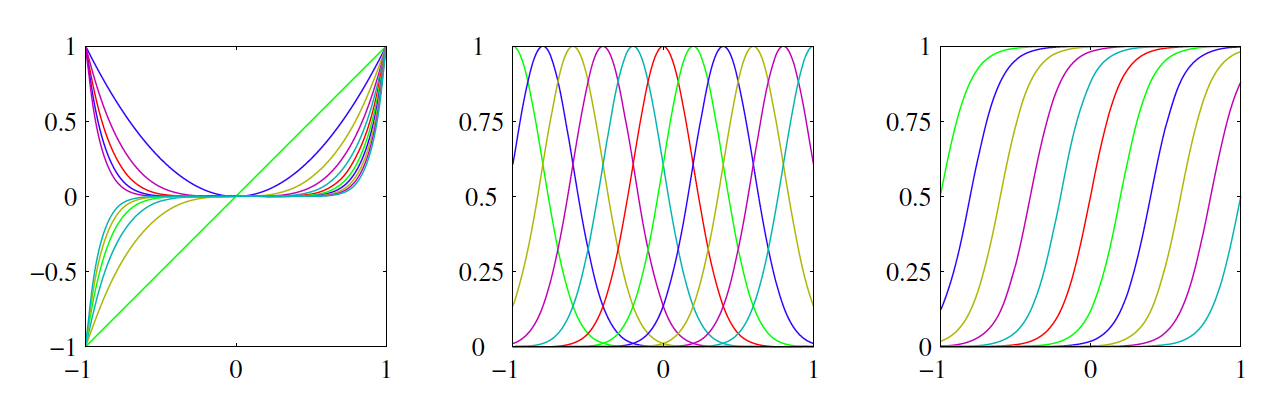

<center>图3.1 基函数的例子，左边显示的是多项式，中间是3.4的高斯，右边3.5是sigmoid。</center>

另一个基函数的选择就是傅里叶基函数。它是在正弦函数上的扩展。每个基函数表示一个特定的频率，有无限的空间范围。相比而言，基函数基于有限输入空间的区域必定包含不同空间频率的频谱。在许多信号处理的应用中，同时考虑在空间和频率上的基函数是非常有趣的，它有一个函数的类别称作小波。为了简化应用，它们都是相互正交的。小波一般是当输入值在一个规则的格子内是合理的，比如在时间序列中的连续时间点，或者是图片中的像素。关于小波的有用内容有Ogden（1997年），Mallat（1999年），和Vidakovic（1999）。

在本章中的大多数讨论，尽管，它是基函数集和的特例，所以对弈不部分我们讨论的，都不会指定基函数的特殊形式，除了数值化绘图目的。事实上，我们讨论的很多都可以使用简单的等式$\phi(\mathbf{x})=\mathbf{x}$的基函数等效。此外，为了能够保持符号的简答，我们会专注于但目标变量$t$的例子。然而，在3.1.5节，我们会大致考虑多目标变量的所需的修改。

#### 3.1.1 最大似然和最小二乘

在第一章，我们通过最小化平方和误差函数来拟合多项式函数数据集。当最大似然解在一个假设高斯噪声模型下，我们展示的这个误差函数会被激活。让我们回到考虑最小二乘方法的讨论，与它相关的最大似然，会更详细。

正如之前，我们假设目标变量$t$是由嘉盛高斯噪声的定义函数$y(\mathbf{x},\mathbf{w})$给出的

$$t = y(\mathbf{x},\mathbf{w}) + \epsilon$$

这里$\epsilon$是均值为0，精度（逆方差）为$\beta$的随机变量高斯。因此我们写作

$$p(t \mid \mathbf{x}, \mathbf{w}, \beta) = \mathcal{N}(t \mid \mathbf{x},\mathbf{w}, \beta^{-1})$$

回想一下，如果我们假设一个平方损失函数，那么最优预测，对于一个新的$\mathbf{x}$值，将给出目标变量的条件均值。在高斯条件3.8例子中，条件均值可以简单地写成

$$\mathbb{E}[t\mid\mathbf{x}]=\int tp(t \mid \mathbf{x})dt = y(\mathbf{x},\mathbf{w})$$

需要注意的是高斯噪声假设有给定$\mathbf{x}$的条件分布$t$是单峰的，这可能对于某些应用来说不适用。一个混合条件高斯的扩展，它是允许多元条件分布的，我们将在14.5.1讨论。

现在考虑输入$\mathbf{X}=\{\mathbf{x_1},\cdots,\mathbf{x_N}\}$，其相应的目标值$t_1,\cdots,t_N$的数据集。我们将目标变量$\{t_n\}$组成成一个列向量以$\mathsf{t}$来表示，它的符号是不同于单个观测值额多元目标的，而这个是用$\mathbf{t}$表示的。假设这些数据点从分布3.8独立生成，我们得到如下似然函数的表达式，其中$\mathbf{w}$和$\beta$的可调参数，形式如下

$$p(\mathsf{t} \mid \mathbf{X}, \mathbf{w}, \beta) = \prod_{n=1}^N\mathcal{N}(t_n \mid \mathbf{w}^\mathsf{T}\mathbf{\phi}(\mathbf{x}_n),\beta^{-1})$$

其中我们使用了3.3。需要注意的是在监督学习问题中，诸如回归问题（和分类），我们不会去旋球对输入变量的分布建模。因此$\mathbf{x}$总是出现在条件变量集合中的，所以从现在开始我们将从表达式中比如$p(\mathsf{t} \mid \mathbf{x}, \mathbf{w}, \beta)$拿掉$\mathbf{x}$，以保持符号的简洁。取对似然函数的对数，使用标准的1.46的单变量高斯，我们有

$$\begin{align*}
\ln p(\mathsf{t} \mid \mathbf{w}, \beta) &= \sum_{n=1}^N\ln\mathcal{N}(t_n \mid \mathbf{w}^\mathsf{T}\mathbf{\phi}(\mathbf{x}_n),\beta^{-1}) \\
&= \frac{N}{2}\ln\beta - \frac{N}{2}\ln(2\pi) - \beta E_D(\mathbf{w})
\end{align*}$$

其中平方和误差函数定义如下

$$E_D(\mathbf{w}) = \frac{1}{2}\sum_{n=1}^N\{t_n - \mathbf{w}^\mathsf{T}\mathbf{\phi}(\mathbf{x}_n)\}^2$$

已经写下了似然函数，我们可以使用最大似然取定义$\mathbf{w}$和$\beta$。首先考虑对$\mathbf{w}$的最大化。正如在1.2.5节中观测的，我们看到线性模型的条件高斯噪声分布的最大化似然函数等价于最小化由$E_D(\mathbf{w})$给出的最小化平方和误差函数。对数似然函数3.11的梯度取如下形式

$$\Delta \ln p(\mathsf{t} \mid \mathbf{w}, \beta) = \sum_{n=1}^N\{t_n - \mathbf{w}^\mathsf{T}\phi(\mathbf{x}_n)\}\phi(\mathbf{x}_n)^\mathsf{T}$$

令这个梯度为0，则有

$$0 = \sum_{n=1}^Nt_n\phi(\mathbf{x}_n)^\mathsf{T} - \mathbf{w}^\mathsf{T}\left(\sum_{n=1}^N\mathbf{\phi}(\mathbf{x}_n)\mathbf{\phi}(\mathbf{x}_n)^\mathsf{T}\right)$$

解得$\mathbf{w}$如下

$$\mathbf{w}_{\text{ML}} = (\mathbf{\Phi}^\mathsf{T}\mathbf{\Phi})^{-1}\mathbf{\Phi}^\mathsf{T}\mathsf{t}$$

这正是我们所熟知的最小二乘问题的正太方程。这里$\Phi$是一个$N \times M$矩阵，成为设计矩阵，它的元素由$\mathbf{\Phi}_{nj} = \phi(\mathbf{x}_n)$，所以

$$\mathbf{\phi} = 
\begin{pmatrix}
\phi_0(\mathbf{x}_1) & \phi_1(\mathbf{x}_1) & \cdots & \phi_{M-1}(\mathbf{x}_1) \\
\phi_0(\mathbf{x}_2) & \phi_1(\mathbf{x}_2) & \cdots & \phi_{M-1}(\mathbf{x}_2) \\
\vdots & \vdots & \ddots & \vdots \\
\phi_0(\mathbf{x}_N) & \phi_1(\mathbf{x}_N) & \cdots & \phi_{M-1}(\mathbf{x}_N)
\end{pmatrix}$$

伪逆

$$\mathbf{\Phi}^{\dagger} \equiv (\mathbf{\Phi}^\mathsf{T}\mathbf{\Phi})^{-1}\mathbf{\Phi}^\mathsf{T}$$

被称为矩阵$\mathbf{\phi}$的Moore-Penrose伪逆（Rao和Mitra，1971年；Golub和Van Loan，1996年）。它可以被称作是非平方矩阵的逆矩阵的泛化。事实上，如果$\mathbf{\phi}$是平方和可逆的，那么使用性质$(AB)^{-1}=B^{-1}A^{-1}$，我们看到$\mathbf{\Phi}^{\dagger} \equiv \mathbf{\Phi}^{-1}$

这时，我们可以更多地光柱偏置参数$w_0$。如果我们使偏差参数显式化，则误差函数3.12会变为

$$E_D(\mathbf{w}) = \frac{1}{2}\sum_{n=1}^N\{t_n - w_0 -\sum_{j=1}^{M-1}w_j\phi_j(\mathbf{x}_n)\}^2$$

令表示$w_0$的求导为0，求解$w_0$，我们得到

$$w_0 = \bar{t} - \sum_{j=1}^{M-1}w_j\bar{\phi}_j$$

其中我们定义

$$\bar{t} = \frac{1}{N}\sum_{n=1}^Nt_n, \hspace{0.5cm} \bar{\phi}_j = \frac{1}{N}\sum_{n=1}^N\phi_j(\mathbf{x}_n)$$

因此偏差$w_0$补偿了目标平均值（在训练数据集）和基函数加权和之间的差异。

我们也可以最大化3.11的对数函数其相应的噪声精度参数$\beta$，给出如下

$$\frac{1}{\beta_{\text{ML}}} = \frac{1}{N}\sum_{n=1}^N\{t_n-\mathbf{w}_\text{ML}^\mathsf{T}\mathbf{\Phi}(\mathbf{x}_n)\}^2$$

所以我们看到噪声精度的逆是由目标值在回归函数附近的残差方差。

#### 3.1.2 最小二乘的几何意义

在这个点，考虑最小二乘解的几何解释是有指导意义的。为了做到这，我们考虑一个$N$维空间的它的坐标轴由$t_n$给出，所以$\mathsf{t}=(t_1,\cdots,t_N)^\mathsf{T}$是在这个空间中的向量。每个基函数$\phi_j(\mathbf{x}_n)$，对$N$个数据点的评估，也可以表示成同一空间中的向量，表示成$\mathbf{\varphi}_j$，如图3.2所示。需要注意的是$\mathbf{\varphi}$是$\mathbf{\Phi}$的$j^{\text{th}}$列，而$\mathbf{\phi}(\mathbf{x}_n)$是$\mathbf{\varphi}$对应的$n^{\text{th}}$行。如果基函数数量$M$小于数据点数量$N$，那么$M$个向量$\phi_j(\mathbf{x}_n)$将张成一个维度$M$的$\mathcal{S}$的线性子空间。我们定义$\mathsf{y}$表示的是$N$维向量，它的元素$n^{\text{th}}$是由$y(\mathbf{x}_n, \mathbf{w})$给出。其中$n=1,\cdots,N$。因为$\mathsf{y}$是向量$\mathbf{\varphi}_j$的任意线性组合，它可以再$M$维子空间的任意地方。3.12的平方和误差是$\mathsf{y}$与$\mathsf{t}$之间平方欧式距离的相等的（会有$1/2$的乘子）。直觉上，从图3.2，我们可以预料到$\mathsf{t}$正交投影到子空间$\mathcal{S}$的就是其相应的解。这是事实上的例子，很容易通过对于由$\mathbf{\Phi}\mathbf{w}_{\text{ML}}$给出的解$\mathsf{y}$进行验证，那么可以确认的是通过取正交投影的形式。

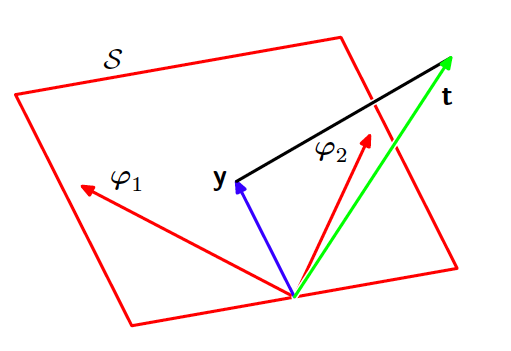

<center>图3.2 最小二乘解的集合解释，是在轴坐标为值$t_1,\cdots,t_N$的$N$维空间。最小二乘回归函数是通过查找数据向量$\mathsf{t}$投影到子空间由基函数$\phi_j(\mathbf{x})$张成的正交映射得到的，它的每个基函数可以看做是有着$N$个长度元素$\phi_j(\mathbf{x}_n)$的向量$\mathbf{\varphi}$。</center>

实际上，当$\mathbf{\Phi}^\mathsf{T}\mathbf{\Phi}$接近于奇异值时，直接求解正规方程可能会导致数值困难。特别是，当两个或多个基向量$\mathbf{\varphi}_j$是共线的，或接近是，结果参数值可能会很大。在处理真实数据集时，这种退化近似并不少见。对于数值困难可以通过奇异值分解，或SVD（Press等人，1992；Bishop和Nabney，2008年）来解决。需要注意的是正则项需要确保矩阵是非奇异的，即使存在退化情况。

#### 3.1.3 序列化学习

批处理技术，比如最大似然解3.15，一次运行处理整个训练数据，对于大容量数据集会有计算成本。正如我们在第一章讨论的，如果数据集足够大，很有必要使用序列化算法，也是我们所知道的在线算法，一次只考虑一个数据点，模型参数会在每次这种呈现后更新。序列化学习也适用于连续流体数据的实时应用，预测会在所有数据点可见之前做出。

我们可以一个月随机梯度下降技术来得到序列化算法，也被称为序列梯度下降，如下。如果误差函数是在数据点$E=\sum_nE_n$上的加和，那么在第$n$次模式呈现后，随机梯度下降算范可以通过如下更新参数向量$\mathbf{w}$

$$\mathbf{w}^{(\tau + 1)} = \mathbf{w}^{(\tau)} - \eta\Delta E_n$$

其中$\tau$表示的迭代次数，$\eta$是学习率参数。我们将很快会讨论对于$\eta$值的选择。值$\mathbf{w}$的初始化向量$\mathbf{w}^{(0)}$。对于平方和误差函数3.12的例子，给出如下

$$\mathbf{w}^{(\tau+1)} = \mathbf{w}^{(\tau)} + \eta(t_n - \mathbf{w}^{(\tau)\mathsf{T}}\mathbf{\phi}_n)\mathbf{\phi}_n$$

其中$\mathbf{\phi}_n=\mathbf{\phi}(\mathbf{x}_n)$。这被称为最小二乘或LMS算法。对于$\eta$值的选择需要小心以确保算法是收敛的（Bishop和Nabney，2008年）。

#### 3.1.4 正则化最小二乘

在第一章1.1，为了控制过拟合，我们引入了添加一个正则化项到误差函数中，所以对误差函数的整体最小化取如下形式

$$E_D(\mathbf{w}) + \lambda E_W(\mathbf{w})$$

其中$\lambda$是用来控制数据依赖误差$E_D(\mathbf{w})$和正则化项$E_W(\mathbf{w})$的重要相关性的正则化系数。一个正则化的重要形式就是由如下权重向量元素的平方和

$$E_W(\mathbf{w}) = \frac{1}{2}\mathbf{w}^{\mathsf{T}}\mathbf{w}$$

如果我们再考虑如下的平方和误差

$$E(\mathbf{w}) = \frac{1}{2}\sum_{n=1}^N\{t_n-\mathbf{w}^{\mathsf{T}}\mathbf{\Phi}(\mathbf{x}_n)\}^2$$

那么整个误差函数会变成

$$\frac{1}{2}\sum_{n=1}^N\{t_n - \mathbf{w}^{\mathsf{T}}\mathbf{\phi}(\mathbf{x}_n)\}^2 + \frac{\lambda}{2}\mathbf{w}^{\mathsf{T}}\mathbf{w}$$

这个选择的特别的正则化也是在机器学习文化中熟知的权重衰减，因为在序列化学习算法中，它鼓励权重值衰减到0，除非是被数据支持的。在统计中，它提供了一个参数首先方法的例子，因为参数值会被收敛到0。它有如下优点：误差函数仍保留$\mathbf{w}$的二次函数，所以它的最小化可以在闭合形式中找到。特别是，对3.27参数$\mathbf{w}$求梯度，并令其为0，如之前一样对$\mathbf{w}$求解，我们得到

$$\mathbf{w} = (\lambda\mathbf{I} + \mathbf{\Phi}^{\mathsf{T}}\mathbf{\Phi})^{-1}\mathbf{\Phi}^{\mathbf{T}}\mathbf{t}$$

这表示了最小二乘解3.15的简单扩展。

一个经常被使用更加通用的正则化，正则化取如下形式

$$\frac{1}{2}\sum_{n=1}^N\{t_n - \mathbf{w}^{\mathsf{T}}\mathbf{\phi}(\mathbf{x}_n)\}^2 + \frac{\lambda}{2}\sum_{j=1}^M|w_j|^q$$

其中$q=2$就是相应的3.27二次型正则化。图3.3显示不同$q$值的正则化函数的等高线。

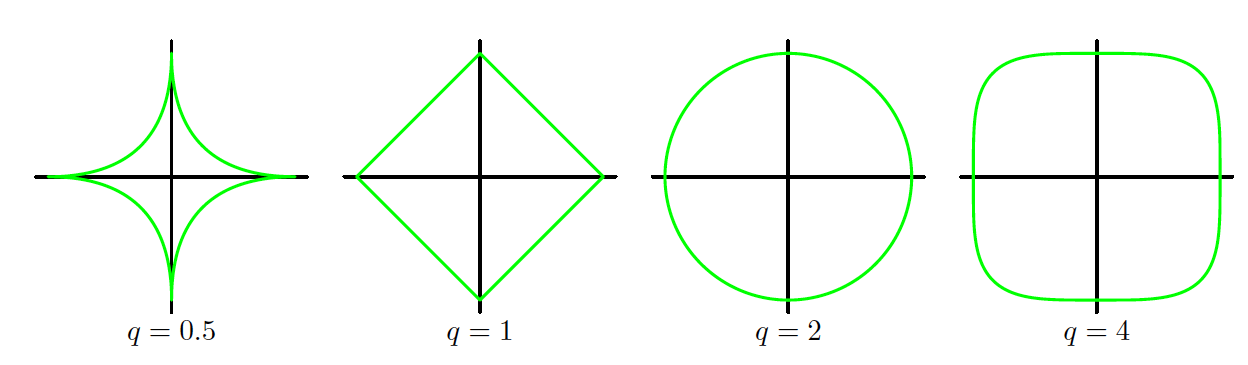

<center>图3.3 3.29中不同参数$q$值的正则化项的等高线。</center>

$q=1$的例子在统计文化汇总也称为lasso（Tibshirani，1996年）。如果有参数$\lambda$足够大，一些系数$w_j$会被迫为0，导致模型系数，这会使得相应的基函数失去作用。为了看到这些，我们先注意3.29是等价于最小化3.12的非正则平方和误差，它满足的条件

$$\sum_{j=1}^M|w_j|^q \le \eta$$

对于参数$\eta$的合适值，有两种方法使用拉格朗日乘子可以关联。对于稀疏的根源可以从图3.4看到，它展示了在调价限制3.30下的最小化误差函数。随着$\lambda$的增长，参数数量的增长也会趋于0。

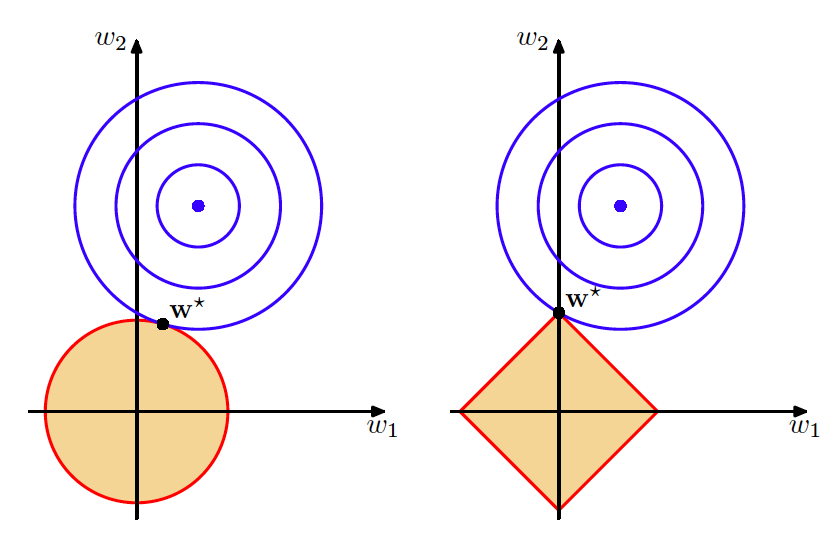

<center>图3.4 图中蓝色部分是无正则化误差函数的等高线在左侧条件区域3.30二次型正则$q=2$，lasso正则$q=1$在右侧，其中参数向量$\mathbf{w}$的最优值由$\mathbf{w}^*$表示。lasso给出了一个稀疏解$w_1^*=0$。</center>

剩余章节，我么将专注于二次型3.27，它即有实际重要性，分析有简单，也易处理。

#### 3.1.5 多输出

迄今，我们考虑的都是单目标变量$t$的例子。在一些应用中，我们可能希望预测$K > 1$的目标变量，我们可以使用目标变量$\mathbf{t}$来表示。这可以通过引入对于$\mathbf{t}$的每个组件的不同基函数集合来完成，要获得多个，不同于回归问题。然而，这也更加有趣，更加通用，方法是使用同样的基函数集来模拟目标向量的所有组件

$$\mathbf{y(x,w)} = \mathbf{W}^{\mathsf{T}}\mathbf{\phi(x)}$$

其中$\mathbf{y}$是$K$维列向量，$\mathbf{W}$是一个$M \times K$的参数矩阵，$\mathbf{\phi(x)}$是一个$M$维有着$\phi_j(\mathbf{x})$元素的列向量，如之前的$\phi_0(\mathbf{x})=\mathbf{1}$。假设我们取目标向量的条件分布的同性质高斯形式

$$p(\mathbf{t}\mid\mathbf{x},\mathbf{W},\beta)=\mathcal{N}(\mathbf{t} \mid \mathbf{W}^{\mathsf{T}}\mathbf{\phi(x)},\beta^{-1}\mathbf{I})$$

如果我们有一个观测值$t_1, \cdots, t_N$的数据集，我们将这些组成一个大小$N \times K$有着$n^{\text{th}}$行由$\mathbf{t}_n^{\mathsf{T}}$给出的矩阵$\mathbf{T}$。类似地，我们可以将输入变量$\mathbf{x}_1,\cdots,\mathbf{x}_N$组成一个矩阵$\mathbf{X}$。对数似然函数给出如下

$$\begin{align*}
\ln p(\mathbf{T} \mid \mathbf{X}, \mathbf{W}, \beta) 
&= \sum_{n=1}^N\ln \mathcal{N}(\mathbf{t}_n \mid \mathbf{W}^{\mathsf{T}}\mathbf{\phi}(\mathbf{x}_n), \beta^{-1}\mathbf{I})\\
&= \frac{NK}{2}\ln\left(\frac{\beta}{2\pi}\right) - \frac{\beta}{2}\sum_{n=1}^N\|\mathbf{t}_n - \mathbf{W}^{\mathsf{T}}\mathbf{\phi}(\mathbf{x}_n)\|^2
\end{align*}$$

正如之前，我们最大化这个函数得到其相应的$\mathbf{W}$，给出如下

$$\mathbf{W}_{\text{ML}} = \bigr(\mathbf{\Phi}^{\mathsf{T}}\mathbf{\Phi}\bigr)^{-1}\mathbf{\Phi}^{\mathsf{T}}\mathbf{T}$$

对于每个目标变量$t_k$，如果我们扩展这个结果，我们有

$$\mathbf{w}_k = \bigr(\mathbf{\Phi}^{\mathsf{T}}\mathbf{\Phi}\bigr)^{-1}\mathbf{\Phi}^{\mathsf{T}}\mathbf{t}_k = \mathbf{\Phi}^{\dagger}\mathbf{t}_k$$

其中$\mathbf{t}_k$是一个$N$维列向量有其分量$t_{nk}$，$n=1,\cdots,N$。因此回归问题的解在不同目标变量间解耦，我们只需要计算单伪逆矩阵$\mathbf{\Phi}^{\dagger}$，它是有所有向量$\mathbf{w}_k$所共享的。

扩展到有着任意协方差矩阵的通用高斯噪声分布是很直接的。这会导致$K$个独立回归问题的解耦。这个结果并不惊讶因为参数$\mathbf{W}$只定义了高斯噪声分布的均值，我们从2.3.4节知道多元高斯均值的最大似然解是独立的协方差。从现在开始，我们还是会明确考虑单目标变量$t$。

#### 3.2 偏差-方差分解

迄今在我们的回归线性模型的讨论中，我们假设形式和基函数的数量都是固定的。正如我们在第一章看到的，使用的是最大似然，或等价的最小二乘，如果复杂模型使用有限数据集来训练模型，会导致过拟合。尽管，为了避免过拟合，限制基函数的数量，会影响模型捕获数据中的有趣的和重要的内容。尽管正则化项的引入能够控制有大量参数的模型的过拟合，这会有这样一个问题：对于正则化系数$\lambda$如何定义合适的值。最小化正则化误差函数搜索的解来表示权重向量$\mathbf{w}$和正则化系数$\lambda$并不是正确的方法，因为这个导致无正则化解$\lambda=0$。

如我们之前章节看到的，过拟合现象真的是最大似然的不好的性质，当我们在贝叶斯中边缘化参数，就不会有这个问题。在本章中，我们将以贝叶斯观点来考虑频率视角的模型复杂度问题，这称为偏差-方差平衡。尽管我们会在线性基函数模型中介绍这个内容，使用一个简单例子就可以很容易表述这些想法，讨论会有很多普适性。

在1.5.5节，当我们讨论了回归问题的决策理论，我们考虑了各种一旦给出条件分布$p(t \mid \mathbf{x})$，就会得到相应的最优预测的损失函数。一个很广泛的选择就是平方损失函数，它的最优预测是由条件期望给出，我们以$h(\mathbf{x})$来表示，给出如下

$$h(\mathbf{x}) = \mathbb{E}[t\mid\mathbf{x}] = \int tp(t\ \mid \mathbf{x})dt$$

此时，值得区分决策理论产生的平方损失函数和模型参数最大似然古籍中出现的平方和误差函数。我们可能会使用比最小二乘更加复杂的技术，比如正则化互全贝叶斯方法，来定义调校分布$p(t \mid \mathbf{x})$。这些都可以为以预测为目的的平方损失函数组合在一起。

在1.5.5解中我们展示了平方损失的期望，可以写作如下形式

$$\mathbb{E}[L] = \int\{y(\mathbf{x}) - h(\mathbf{x})\}^2p(x)d\mathbf{x} + \int\{h(\mathbf{x}) - t\}^2p(x)d\mathbf{x}dt$$

回想一下第二项，是与$y(\mathbf{x}$独立的，产生自数据上的固有噪声和代表期望损失的最小可实现值。第一项依赖于我们对函数$h(\mathbf{x})$的选择，我们也会找到使得这项最小的$h(\mathbf{x})$的解。因为它是非负的，我们期望的最小值那就是使得这项为0。如果我们有一个无限数据的供应（无限计算资源），我们原则上能找到任何精度需求自由度的回归函数$h(\mathbf{x})$，这代表对$h(\mathbf{x})$的最优选择。尽管，实施航我们有一个数据集$\mathcal{D}$只包含有限数量的$N$个数据点，因此我们并不能精确地知道回归函数$h(\mathbf{x})$。

如果我们用一个由参数向量$\mathbf{w}$控制的参数化函数$y(\mathbf{x}, \mathbf{w})$来对$h(\mathbf{x})$建模，那么从贝叶斯视角，模型中的不确定性是通过一个参数$\mathbf{w}$上的后验分布来表达。然而，频率处理会涉及基于数据集$\mathcal{D}$的$\mathbf{w}$的点估计，会通过多次的思考实验来取代这种估计的不确定性解释。假设我们有一个很大数量的数据集其大小为$N$，每个都是独立采样自分布$p(t,\mathbf{x})$。对于任何给定的数据集$\mathcal{D}$，我们可以运行我们的学习算法，得到一个预测函数$y(\mathbf{x};\mathcal{D})$。不同的融合数据集会给出不同的函数，因而会有平方损失的不同值。一个特殊学习算法的性能是通过去融合数据集的平均来评估的。

考虑3.37中的第一项的积分，它的一个特殊数据集$\mathcal{D}$取如下形式

$$\{y(\mathbf{x};\mathcal{D}) - h(\mathbf{x})\}^2$$

因为这个量是与这个特殊数据集$\mathcal{D}$相关的，我们取在融合数据集上的平均。如果我们加上，再减去大括号内的量$\mathbb{E}_{\mathcal{D}}[y(\mathbf{x};\mathcal{D})]$，然后再展开，我们有

$$\{y(\mathbf{x};\mathcal{D}) - \mathbb{E}_{\mathcal{D}}[y(\mathcal{x};\mathcal{D})] + \mathbb{E}_{\mathcal{D}}[y(\mathcal{x};\mathcal{D})] - h(\mathbf{x})\}^2
= \{y(\mathbf{x};\mathcal{D}) - \mathbb{E}_{\mathcal{D}}\}^2 + \{\mathbb{E}_{\mathcal{D}}[y(\mathcal{x};\mathcal{D})] - h(\mathbf{x})\}^2 + 2\{y(\mathbf{x};\mathcal{D}) - \mathbb{E}_{\mathcal{D}}\}\{y(\mathcal{x};\mathcal{D})] - h(\mathbf{x})\}$$

我们现在取这个表达式的期望来表示$\mathcal{D}$，需要注意的是最终项会消掉，给出如下

$$\mathbb{E}_{\mathcal{D}}[\{y(\mathbf{x};\mathcal{D})\}] = \underbrace{\{\mathbb{E}_{\mathcal{D}}[y(\mathbf{x};\mathcal{D})] - h(\mathbf{x})\}^2}_{\color{blue}{(bias)^2}} + \underbrace{\mathbb{E}_{\mathcal{D}}[\{y(\mathbf{x};\mathcal{D}) - \mathbb{E}_{\mathcal{D}}[y(\mathbf{x};\mathcal{D})]\}^2]}_{\color{red}{variance}}$$

我们看到$y(\mathbf{x};\mathcal{D})$和回归函数$h(\mathbf{x})$的期望平方是不同，它可以由两项和来表示。第一项，叫做平方偏差，它表示了在所有数据集上的平均预测与期望回归函数上的不同程度（注：所有数据集上的期望值更是希望达到的，而实际建模并不能达到这个期望，所以存在偏差）。第二项，称作方差，衡量的是独立数据集在其均值附近的解，因此这衡量的是函数$y(\mathbf{x};\mathcal{D})$对特定数据集选择的敏感性。待会儿我们会考虑一个简单的例子来提供对这些定义支持的直觉印象。

迄今为止，我们已考虑了单输入值$\mathbf{x}$。如果我们将这个展开式带入到3.37中，我们得到以下期望平方损失的分解

$$\text{expected loss} = \text{(bias)}^2 + \text{variance} + \text{noise}$$

其中

$$\text{(bias)}^2 = \int\{\mathbb{E}_{\mathcal{D}}[y(\mathbf{x};\mathcal{D})] - h(\mathbf{x})\}^2p(\mathbf{x})d\mathbf(x)$$

$$\text{variance} = \int\mathbb{E}_{\mathcal{D}}[\{y(\mathbf{x};\mathcal{D}) - \mathbb{E}_{\mathcal{D}}[y(\mathbf{x};\mathcal{D})]\}^2]p(\mathbf{x})d\mathbf(x)$$

$$\text{noise} = \int\{h(\mathbf{x}) - t\}^2p(x)d\mathbf{x}dt$$

偏差和方差项现在关联到整合量。

我们的目标是最小化期望损失，它被分解成平方偏差和，方差，和一个噪声项常量。正如我么看到的，在偏差和方差之间有一个平衡，非常灵活的模型有着低偏差和高方差，而死板的模型有着高偏差和低方差。而最优预测能力的模型它能够在偏差和方差之间平衡好。这个是在第一章中用到的数据集绘制的正弦函数。这里我们生成100个数据集，每个包含$N=25$个数据点，都是独立产生于正弦曲线$h(x)=\sin(2\pi x)$。数据集的下标$l=1,\cdots,L$，其中$L=100$，对于每个数据集$\mathcal{D}^{(l)}$，我么通过最小化3.27的正则化误差函数，拟合一个有着24个高斯的基函数的模型，来给出如图3.5显示的预测函数$y^{(l)}(x)$。最上面的那行其相应的正则化系数$\lambda$更大，得到的方差更低（因为左图绘制的红色曲线看起来更相似），但偏差较高（因为右图中的两个曲线是相当不同的）。相反在底部那行，$\lambda$值更小，有一个大的方差（左图红色曲线有着更高的变化率），底偏差（它显示了在平均模型拟合和原始正弦函数的较好的拟合）。需要注意的有着$M=25$的复杂模型求平均的许多解的结果非常适合回归函数，这表明平均可能是一个有益的过程。事实上，多解的加权平均是贝叶斯方法的核心，尽管平均是关于参数的后验分布，而不是关于多个数据集。

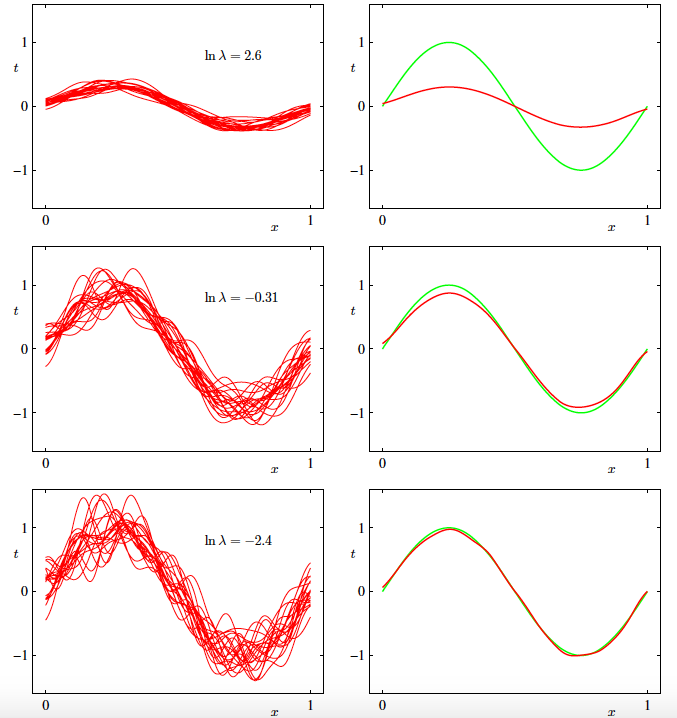

<center>图3.5 图中画的是复杂模型上的偏差和方差的相关性，由正则化参数$\lambda$控制，使用第一章中的正弦数据集。有$L=100$个数据集，每个有着$N=25$的数据点，模型中有24个高斯基函数，所以参数的总个数为$M=25$，包含偏置参数。左列显示的是各种$\ln\lambda$（为了清楚起见，仅显示了100个中的20个）值拟合数据的模型结果。右列显示的是相应的100个拟合平均（红色）沿着生成（绿色）的数据集的正弦函数。</center>

对于这个例子，我们可以定量地检验偏差-方差平衡。从如下评估的均值预测

$$\bar{y}(x) = \frac{1}{L}\sum_{l=1}^Ly^{(l)}\bigr(x\bigr)$$

积分平方偏差和积分方差如下给出

$$\text{(bias)}^2 = \frac{1}{N}\sum_{n=1}^N\bigr\{\bar{y}\bigr(x_n\bigr) - h\bigr(x_n\bigr)\bigr\}^2$$

$$\text{variance} = \frac{1}{N}\sum_{n=1}^N\frac{1}{L}\bigr\{y^{(l)}\bigr(x_n\bigr) - \bar{y}\bigr(x_n\bigr)\bigr\}^2$$

> 注意：这里可以仔细思考一下这两个公式，一个是偏差的平方，它是以100个数据集产生的均值来近似真实数据的情况，与假设函数预测的差距；而方差则是每个数据集得到的预测模型与这100个模型均值的差距，表示了模型的震荡。（好好想想就明白了！）

其中分布$p(x)$上的$x$的加权积分近似于从这个分布上采样的数据点的有效加和。这些量的加和，如图3.6所示的$\ln\lambda$的函数。我们看到较小的$\lambda$允许模型微调到每个独立数据集上噪声导致的大方差。相反，一个大的$\lambda$值会使得权重参数趋于0导致大的偏差。

尽管偏差-方差分解可以从频率视角发现模型复杂问题中有趣的内容，它的使用价值是有限的，因为偏差-方差分解时基于融合数据集表示的均值的，然而实际我们只有单个观测数据集。如果我们有很多给定大小的独立训练数据集，我们能更好地将这些组合成一个较大的单训练数据集，当然它也会减小给定模型复杂度的过拟合的级别。

有了这些限制，下一张我们会转到线性基函数模型的贝叶斯处理，它不仅提供一个更加的视角来处理过拟合问题，而且在解决模型复杂度上也有实际作用。

#### 3.3 贝叶斯线性回归

在我们对线性回归模型的参数设置最大似然的讨论中，我们已经看到有效模型的复杂度，控制着基函数的数量，需要根据数据集的代销来控制。增加一个正则化项到对数似然函数中意味着有效模型的复杂度会被正则化系数值控制，尽管数目和基函数形式的选择仍然在决定所有模型行为上式重要的。

剩下的问题就是决定这个特殊问题的合适模型复杂度，不能简单使用最大似然函数来决定，因为这会使得模型过分地复杂，并过拟合。独立的数据可以被用于定义模型复杂度，正如1.3节讨论的那样，但是这个会有计算量过大和浪费数据的问题。我们因此转到线性回归的贝叶斯处理，这会避免最大似然的过拟合问题，也会导致仅使用训练数据来确定模型复杂性的自动方法。再次地，为了明确起见我们将聚焦于单目标变量$t$的例子。扩展到多目标变量也很直接，遵循3.1.5的讨论即可。

#### 3.3.1 参数分布

